In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/data.csv')
df.head()

,id,branch,found,course,daynight,major,school,school_area,sex,age,...,q001,q002,q003,q004,q006,p001,p026,p029,p036,p045
0,5.0,1.0,3.0,3.0,0,1.0,1.0,1,1,26.333333,...,3.0,2.0,8.0,0,1.0,1.0,5.0,5.0,6.00,0
1,167.0,1.0,3.0,5.0,1,1.0,1.0,1,1,24.333333,...,2.0,3.0,5.0,1,3.0,1.0,5.0,5.0,2.00,0
2,187.0,1.0,3.0,3.0,0,1.0,1.0,0,1,28.500000,...,5.0,10.0,7.0,0,3.0,1.0,5.0,6.0,3.01,0
3,237.0,1.0,3.0,3.0,1,1.0,1.0,1,1,23.500000,...,4.0,2.0,7.0,0,3.0,1.0,3.0,4.0,3.00,0
4,260.0,1.0,3.0,5.0,1,1.0,1.0,0,1,24.750000,...,1.0,5.0,6.0,0,1.0,1.0,3.0,3.0,2.00,0


In [3]:
df.columns

Index(['id', 'branch', 'found', 'course', 'daynight', 'major', 'school',
       'school_area', 'sex', 'age', 'hire_state', 'b022', 'b023', 'b036',
       'b038', 'b039', 'b040', 'f009', 'i001', 'i033', 'i037', 'i042', 'i046',
       'i066', 'i076', 'l001', 'l009', 'l016', 'm002', 'k110', 'k004', 'k007',
       'k009', 'k011', 'q001', 'q002', 'q003', 'q004', 'q006', 'p001', 'p026',
       'p029', 'p036', 'p045'],
      dtype='object')

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(df.drop(['hire_state'],axis=1), df['hire_state'], random_state=0)

In [5]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(0.7688227241615332, 0.7785476007185014)

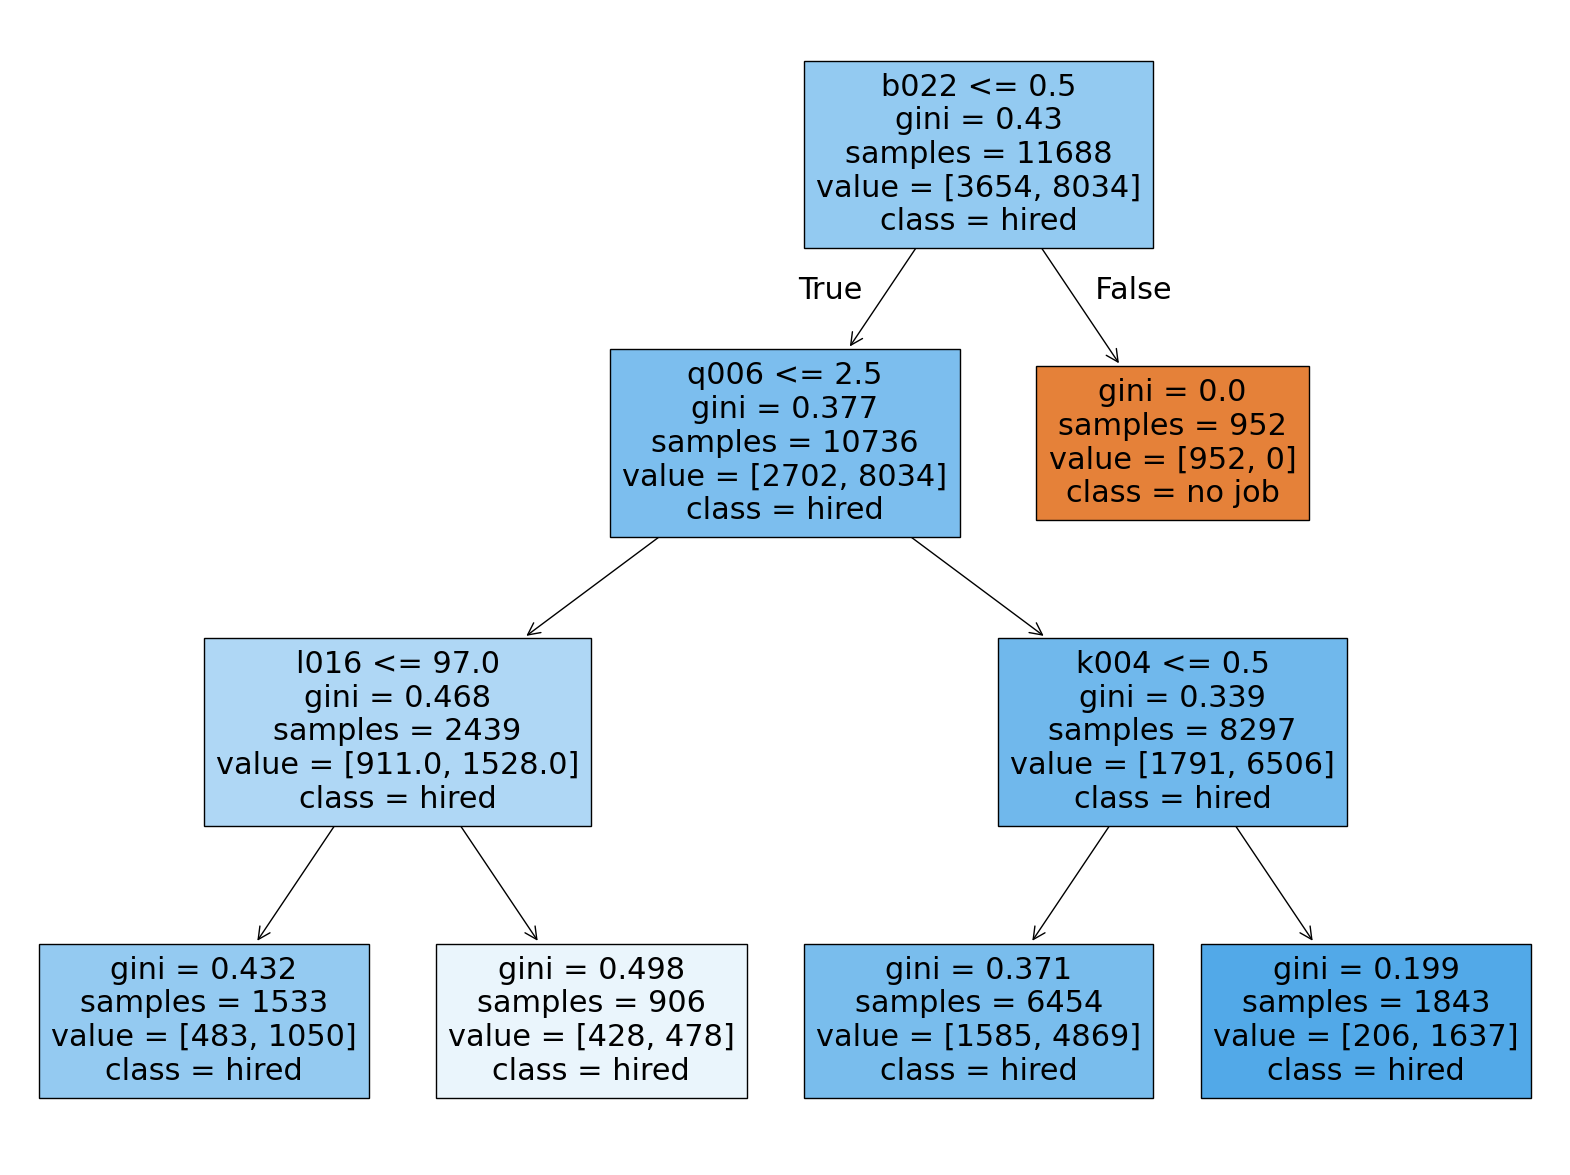

In [6]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
# plot_tree(dt_clf)
plot_tree(dt_clf, filled=True,   # 색 채우기 옵션 (특정 클래스의 비율 표현)
          feature_names=list(X_train.columns),    # 특성 이름 
          class_names=['no job','hired'],  # 클래스 이름
          max_depth=5 # 그림에 대하여 최대 깊이 지정
)
plt.show()

In [7]:
aa = df[['hire_state','b040']]
aa.groupby('hire_state').value_counts()

hire_state  b040
0           0        3981
            1         872
1           0       10732
Name: count, dtype: int64

In [29]:
# b로 시작하는 변수 삭제
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier()

X = df.drop(['hire_state','b022', 'b023', 'b036', 'b038', 'b039', 'b040'],axis=1)
y = df['hire_state']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(0.7015742642026009, 0.6918142160636387)

In [31]:
from sklearn.metrics import confusion_matrix
y_pred = dt_clf.predict(X_test)
confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[ 274,  925],
       [ 276, 2422]])

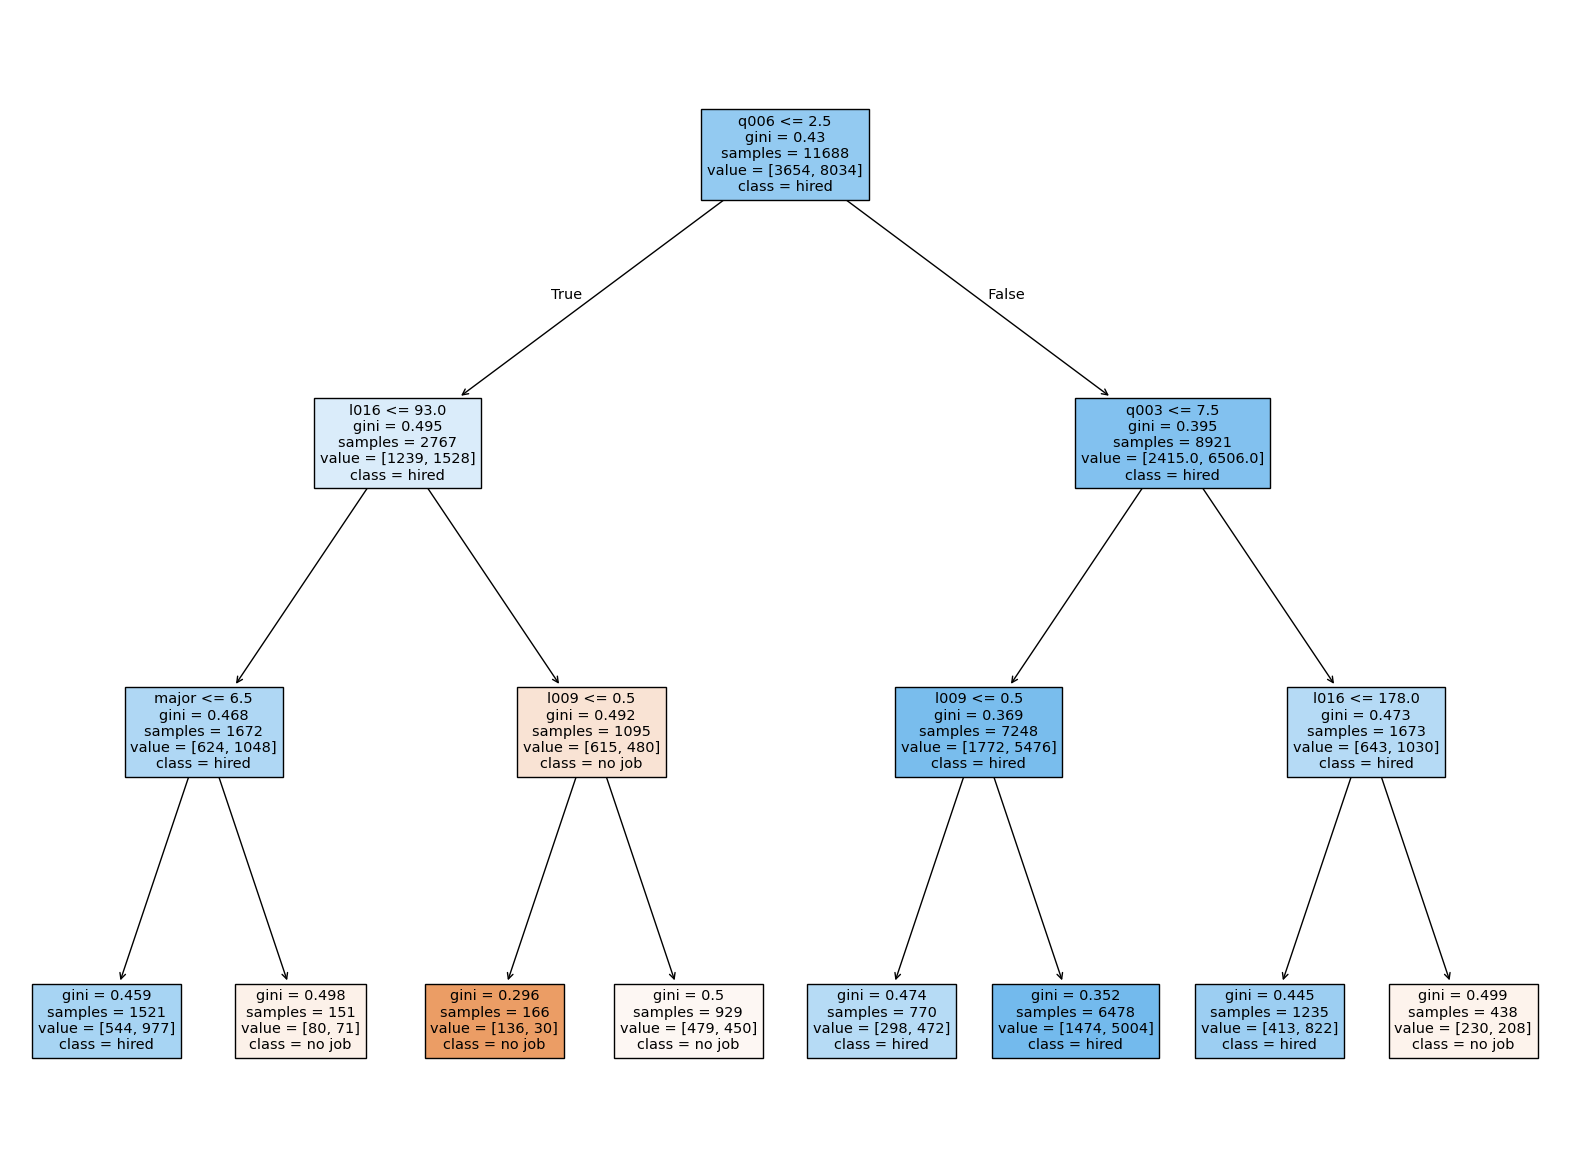

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
# plot_tree(dt_clf)
plot_tree(dt_clf, filled=True,   # 색 채우기 옵션 (특정 클래스의 비율 표현)
          feature_names=list(X_train.columns),    # 특성 이름 
          class_names=['no job','hired'],  # 클래스 이름
          max_depth=5 # 그림에 대하여 최대 깊이 지정
)
plt.show()
# q006: 음주빈도2.5이하 취직, l016: 훈련시간 93시간 이하 취직, q003: 하루 평균 수면시간7.5이하 취직

In [11]:
# cv stratified 머시기로 해보기
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
skf = StratifiedKFold(n_splits=5)
params = {
    "max_depth": [1,2,3,4,5,6,7]
}
gscv_tree = GridSearchCV (dt_clf, params, scoring ='accuracy', cv = skf)
gscv_tree.fit(X_train, y_train)
print(gscv_tree.best_estimator_)
pd.DataFrame(gscv_tree.cv_results_)

DecisionTreeClassifier(max_depth=4, random_state=0)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009338,0.001782,0.002487,0.001467,1,{'max_depth': 1},0.687340,0.687340,0.687340,0.687634,0.687206,0.687372,0.000141,7
1,0.011135,0.000865,0.001434,0.000513,2,{'max_depth': 2},0.695038,0.712575,0.698033,0.692769,0.694480,0.698579,0.007201,6
2,0.014932,0.000231,0.001462,0.000549,3,{'max_depth': 3},0.693328,0.713003,0.702310,0.691485,0.696192,0.699263,0.007787,5
3,0.019783,0.000639,0.001596,0.000468,4,{'max_depth': 4},0.710009,0.724123,0.705731,0.706461,0.702182,0.709701,0.007627,1
4,0.022544,0.001223,0.001623,0.000493,5,{'max_depth': 5},0.711292,0.725834,0.703165,0.705605,0.691057,0.707391,0.011342,3
5,0.026138,0.000767,0.001686,0.000561,6,{'max_depth': 6},0.707870,0.724123,0.704021,0.702182,0.700043,0.707648,0.008630,2
6,0.030865,0.002538,0.001669,0.000498,7,{'max_depth': 7},0.698460,0.720274,0.701027,0.697903,0.694480,0.702429,0.009163,4


In [12]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=4)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

print(dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test))

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=5)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

print(dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test))

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=6)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

print(dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test))

0.7174024640657084 0.7143956889915319
0.7238193018480493 0.7097767513471901
0.731776180698152 0.7095201437002823


In [13]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_features='sqrt',  # 특성의 일부만 사용
    random_state=42
)
rf_clf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf_clf.score(X_test, y_test))

Random Forest Accuracy: 0.7205542725173211


In [14]:
# !pip install xgboost

In [15]:
# xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=0
)

xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

0.7418720054757015
0.724659994867847
              precision    recall  f1-score   support

           0       0.73      0.28      0.40      3654
           1       0.74      0.95      0.84      8034

    accuracy                           0.74     11688
   macro avg       0.74      0.62      0.62     11688
weighted avg       0.74      0.74      0.70     11688

              precision    recall  f1-score   support

           0       0.63      0.25      0.36      1199
           1       0.74      0.94      0.82      2698

    accuracy                           0.72      3897
   macro avg       0.69      0.59      0.59      3897
weighted avg       0.71      0.72      0.68      3897



In [16]:
# !pip install imblearn

In [17]:
# oversampleing
from collections import Counter    
counter = Counter(y)
print(counter)

Counter({1: 10732, 0: 4853})


In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
smt = SMOTE(random_state=42)
X_new, y_new = smt.fit_resample(X, y)
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

counter = Counter(y_new)
print(counter)

Counter({0: 10732, 1: 10732})


0.6923841470990185 0.6805814386880358


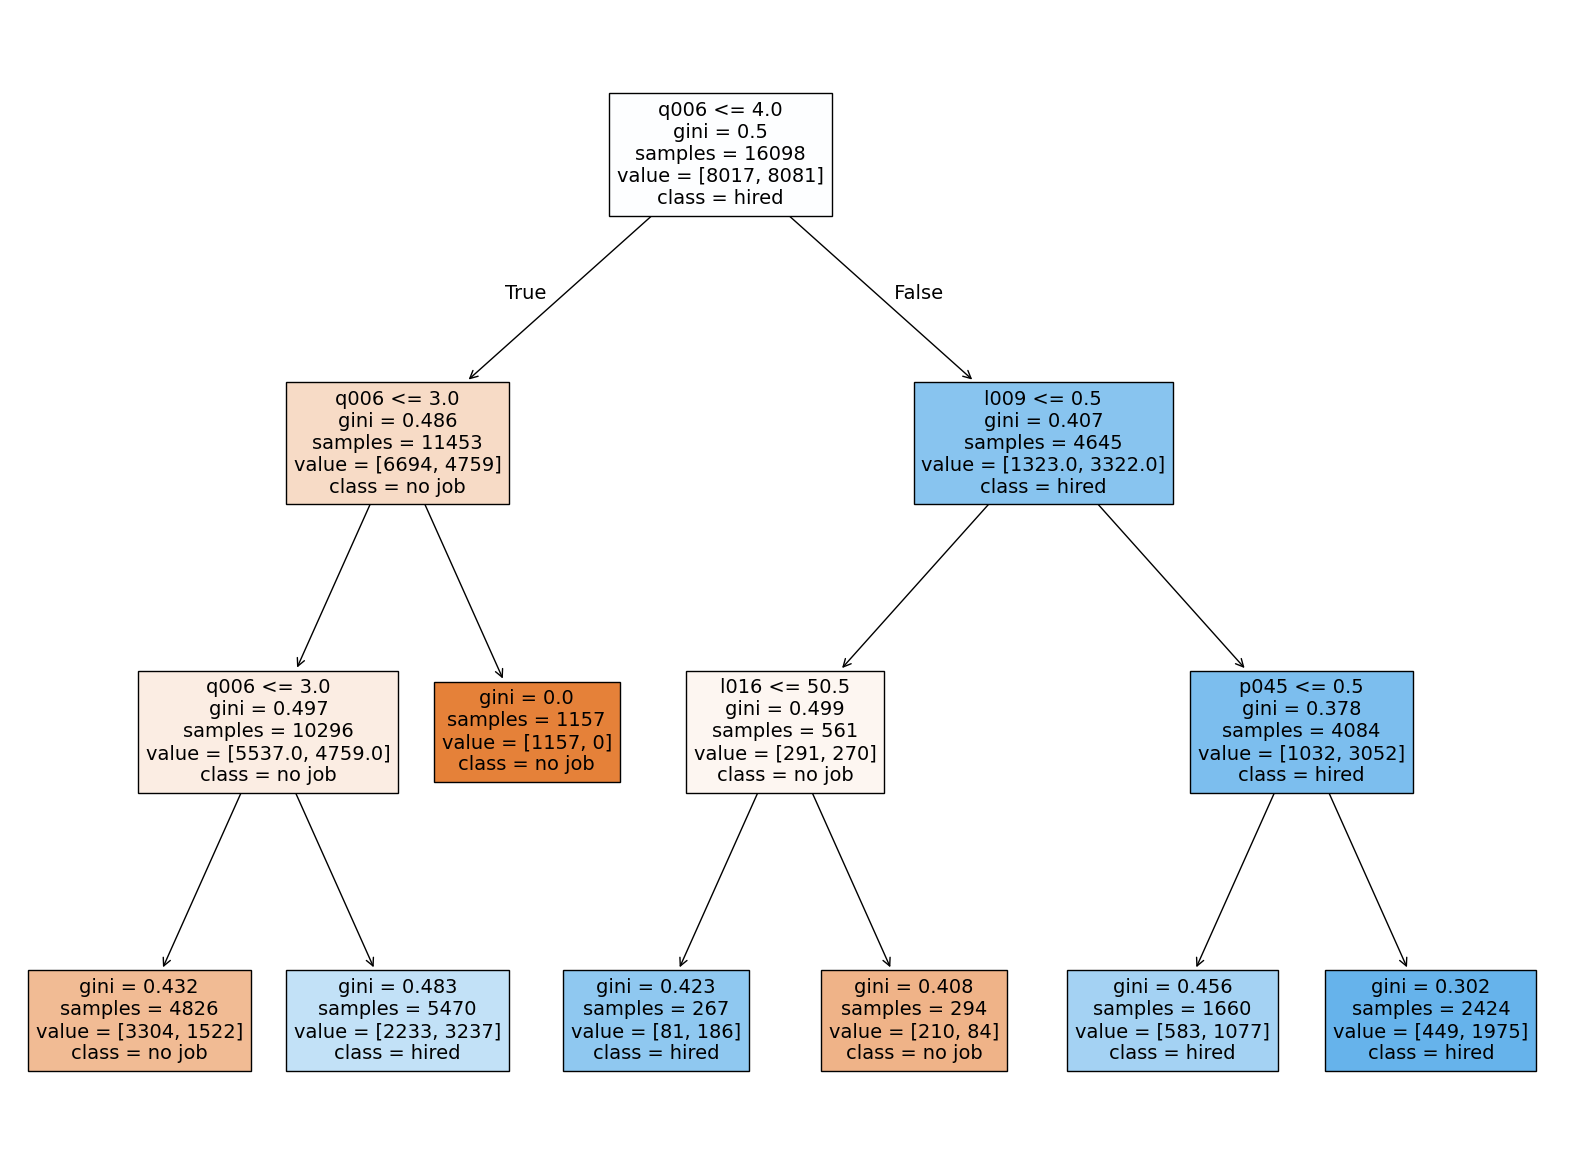

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=0)

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

print(dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test))

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
# plot_tree(dt_clf)
plot_tree(dt_clf, filled=True,   # 색 채우기 옵션 (특정 클래스의 비율 표현)
          feature_names=list(X_train.columns),    # 특성 이름 
          class_names=['no job','hired'],  # 클래스 이름
          max_depth=5 # 그림에 대하여 최대 깊이 지정
)
plt.show()

# q006: 음주빈도 4. 일주일 1~2회 이하 취직, 
# q006: 음주빈도 3. 한달 1~2회 이하 무직,
# l016: 훈련시간 50.5시간 이하 무직, 
# l009: 직업훈련 수료여부 수료 안함 취직

In [58]:
y_pred = dt_clf.predict(X_test)
confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[1550, 1165],
       [ 549, 2102]])

그리드서치

In [62]:
skf = StratifiedKFold(n_splits=5)
dt_clf = DecisionTreeClassifier(random_state=0)
params = {
    "max_depth": [3,4,5,6,7,8,9,10]
}
gscv_tree = GridSearchCV (dt_clf, params, scoring ='accuracy', cv = skf)
gscv_tree.fit(X_train, y_train)
print(gscv_tree.best_estimator_)
pd.DataFrame(gscv_tree.cv_results_)

DecisionTreeClassifier(max_depth=8, random_state=0)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027734,0.001031,0.002241,0.000432,3,{'max_depth': 3},0.690994,0.698137,0.692857,0.694936,0.685306,0.692446,0.004286,8
1,0.034120,0.001028,0.002090,0.000155,4,{'max_depth': 4},0.713354,0.712733,0.711180,0.709848,0.705809,0.710585,0.002683,7
2,0.039019,0.001103,0.001945,0.000496,5,{'max_depth': 5},0.720186,0.716149,0.728882,0.716372,0.715750,0.719468,0.004971,6
3,0.044827,0.001393,0.001633,0.000803,6,{'max_depth': 6},0.740373,0.734472,0.738509,0.727244,0.733147,0.734749,0.004577,5
4,0.049310,0.001200,0.001996,0.000513,7,{'max_depth': 7},0.754037,0.741304,0.753416,0.742467,0.749612,0.748167,0.005361,4
5,0.057959,0.006164,0.002206,0.000172,8,{'max_depth': 8},0.763975,0.750311,0.745031,0.749301,0.754582,0.752640,0.006430,1
6,0.060102,0.001802,0.002328,0.000379,9,{'max_depth': 9},0.763354,0.747205,0.744099,0.753340,0.752408,0.752081,0.006577,2
7,0.064599,0.001747,0.002531,0.000461,10,{'max_depth': 10},0.758696,0.745031,0.746273,0.741845,0.749301,0.748229,0.005753,3


In [61]:
# 랜덤 포레스트
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_features='sqrt',  # 특성의 일부만 사용
    random_state=42
)
rf_clf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf_clf.score(X_test, y_test))

Random Forest Accuracy: 0.7918374953410362


In [65]:
skf = StratifiedKFold(n_splits=5)
rf_clf = RandomForestClassifier(random_state=0)
params = {
    "max_depth": [10,11,12,13,14,15],
    "n_estimators": [50, 100, 300, 500]
}
gscv_rf = GridSearchCV (rf_clf, params, scoring ='accuracy', cv = skf)
gscv_rf.fit(X_train, y_train)
print(gscv_rf.best_estimator_)
pd.DataFrame(gscv_rf.cv_results_)

RandomForestClassifier(max_depth=14, n_estimators=500, random_state=0)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.507413,0.010269,0.014408,0.000853,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.789130,0.784161,0.786335,0.782231,0.789376,0.786247,0.002778,24
1,1.001969,0.009136,0.025688,0.000659,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.791615,0.788820,0.789441,0.782852,0.790308,0.788607,0.003027,20
2,2.929746,0.022489,0.071726,0.001734,10,300,"{'max_depth': 10, 'n_estimators': 300}",0.788509,0.790062,0.788199,0.780988,0.796210,0.788794,0.004857,19
3,4.848895,0.013398,0.118851,0.003236,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.788199,0.788199,0.786335,0.780677,0.795899,0.787862,0.004874,21
4,0.525229,0.004236,0.015373,0.001054,11,50,"{'max_depth': 11, 'n_estimators': 50}",0.790683,0.787888,0.781988,0.780367,0.794035,0.786992,0.005157,23
5,1.054232,0.010250,0.027893,0.000530,11,100,"{'max_depth': 11, 'n_estimators': 100}",0.792547,0.788199,0.785093,0.784716,0.799317,0.789974,0.005450,16
6,3.149902,0.005992,0.077888,0.002046,11,300,"{'max_depth': 11, 'n_estimators': 300}",0.789752,0.791304,0.789752,0.782852,0.794967,0.789725,0.003930,17
7,5.187389,0.044447,0.129082,0.003715,11,500,"{'max_depth': 11, 'n_estimators': 500}",0.794099,0.789752,0.790994,0.783784,0.793725,0.790471,0.003722,15
8,0.568646,0.003290,0.015831,0.000296,12,50,"{'max_depth': 12, 'n_estimators': 50}",0.798137,0.794720,0.780124,0.780988,0.792171,0.789228,0.007334,18
9,1.148423,0.013213,0.030130,0.000671,12,100,"{'max_depth': 12, 'n_estimators': 100}",0.798758,0.801242,0.788509,0.782852,0.795589,0.793390,0.006785,9


In [66]:
skf = StratifiedKFold(n_splits=5)
rf_clf = RandomForestClassifier(random_state=0)
params = {
    "max_depth": [14],
    "n_estimators": [300, 400, 500, 600, 800, 1000]
}
gscv_rf = GridSearchCV (rf_clf, params, scoring ='accuracy', cv = skf)
gscv_rf.fit(X_train, y_train)
print(gscv_rf.best_estimator_)
pd.DataFrame(gscv_rf.cv_results_)

RandomForestClassifier(max_depth=14, n_estimators=500, random_state=0)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.838824,0.026138,0.099754,0.006743,14,300,"{'max_depth': 14, 'n_estimators': 300}",0.799379,0.797826,0.796894,0.789376,0.800870,0.796869,0.003984,6
1,5.095910,0.037752,0.135237,0.004841,14,400,"{'max_depth': 14, 'n_estimators': 400}",0.801863,0.799689,0.795031,0.791240,0.802734,0.798111,0.004351,2
2,6.369977,0.051152,0.170988,0.003626,14,500,"{'max_depth': 14, 'n_estimators': 500}",0.803416,0.799689,0.797516,0.792171,0.803976,0.799354,0.004312,1
3,8.877989,0.821909,0.211703,0.014495,14,600,"{'max_depth': 14, 'n_estimators': 600}",0.801242,0.799068,0.795963,0.791240,0.802112,0.797925,0.003960,3
4,12.108014,1.061899,0.275865,0.009198,14,800,"{'max_depth': 14, 'n_estimators': 800}",0.801553,0.799689,0.796273,0.791240,0.799938,0.797739,0.003676,5
5,12.899863,0.664551,0.321921,0.005919,14,1000,"{'max_depth': 14, 'n_estimators': 1000}",0.800311,0.799068,0.797826,0.790618,0.801180,0.797801,0.003766,4


In [45]:
# xgboost
xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=0
)

xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))
confusion_matrix(y_test, y_pred_test, labels=[0, 1])

0.8079264504907442
0.7912784196794633
              precision    recall  f1-score   support

           0       0.89      0.70      0.78      8017
           1       0.75      0.92      0.83      8081

    accuracy                           0.81     16098
   macro avg       0.82      0.81      0.81     16098
weighted avg       0.82      0.81      0.81     16098

              precision    recall  f1-score   support

           0       0.88      0.68      0.77      2715
           1       0.73      0.91      0.81      2651

    accuracy                           0.79      5366
   macro avg       0.81      0.79      0.79      5366
weighted avg       0.81      0.79      0.79      5366



array([[1838,  877],
       [ 243, 2408]])

----------------------
추가적인 모델 사용

In [55]:
# 로지스틱
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

print(lr_clf.score(X_train_scaled, y_train), lr_clf.score(X_test_scaled, y_test))

0.7125108709156417 0.6964219157659337


In [56]:
# SVM
from sklearn.svm import SVC

model = SVC(kernel="rbf")   # kernel 기본값 "rbf"
model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.5280780221145484, 0.5370853522176668)

In [ ]:
# knn

In [ ]:
# MLP
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(100,100,100,100,100),
    activation='relu',
    solver='adam',
    max_iter=5000,
    random_state=42
)
mlp.fit(X_train, y_train)

pred = mlp.predict(X_test)
print(accuracy_score(y_test, pred))
confusion_matrix(y_test, pred, labels=[0, 1])

0.5074543421543048


array([[2702,   13],
       [2630,   21]])